# **FILE PREPARATION!**

---

## **Library**

In [ ]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import zipfile
import matplotlib.image as mpimg

# libraries for TF and transfer learning
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from google.colab import files

# warnings
import warnings
warnings.filterwarnings('ignore')

print('Importing libraries completed.')

Importing libraries completed.


## **Data Preparation**

In [ ]:
# Connect google colab with your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Extract the dataset
!unzip '/content/drive/MyDrive/reSaji_Inkubasi🍏/ML/Pt4Custom_Fruits&Vegetables.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f504.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f505.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f506.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f507.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f508.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f509.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f510.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f511.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f512.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f513.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f514.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra/o_f515.png  
  inflating: Pt4Custom_Fruits&Vegetables/Vegetabl

In [ ]:
import shutil

# List of directory paths to delete
dir_paths = ['/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshJujube', '/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshGuava', '/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshLemon', '/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshLulo', '/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshPomegranate', '/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshStrawberry', '/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshTamarillo',
             '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenJujube', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenGuava', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenLemon', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenLulo', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenPomegranate', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenStrawberry', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenTamarillo']

# Delete each directory and its contents
for dir_path in dir_paths:
    shutil.rmtree(dir_path, ignore_errors=True)
    print(f'Directory {dir_path} and all its contents have been deleted.')


Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/FreshJujube and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/FreshGuava and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/FreshLemon and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/FreshLulo and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/FreshPomegranate and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/FreshStrawberry and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/FreshTamarillo and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/RottenJujube and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Fruits/RottenGuava and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&V

In [ ]:
import shutil

# List of directory paths to delete
dir_paths = [ '/content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshBitterGourd', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshPotato', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshTomato',
             '/content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenBitterGourd', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenOkra', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenPotato', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenTomato']

# Delete each directory and its contents
for dir_path in dir_paths:
    shutil.rmtree(dir_path, ignore_errors=True)
    print(f'Directory {dir_path} and all its contents have been deleted.')

Directory /content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshBitterGourd and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshOkra and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshPotato and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshTomato and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenBitterGourd and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenOkra and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenPotato and all its contents have been deleted.
Directory /content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenTomato and all its contents have been deleted.


In [ ]:
# Buat folder baru untuk menggabungkan isi kedua folder
os.makedirs('/content/Pt4Custom_Fruits&Vegetables/dataset/Apel', exist_ok=True)

# Pindahkan isi folder1 dan folder2 ke combined_folder
for src_folder in ['/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshApple', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenApple']:
    for item in os.listdir(src_folder):
        shutil.move(os.path.join(src_folder, item), '/content/Pt4Custom_Fruits&Vegetables/dataset/Apel')

# Verifikasi isi combined_folder
print("Isi combined_folder:", os.listdir('/content/Pt4Custom_Fruits&Vegetables/dataset/Apel'))

Isi combined_folder: ['freshApple (162).jpg', 'freshApple (541).png', 'freshApple (700).png', 'rottenApple (228).jpg', 'freshApple (464).png', 'freshApple (203).jpg', 'rottenApple (4).webp', 'freshApple (216).jpg', 'freshApple (589).png', 'rottenApple (372).jpg', 'freshApple (776).png', 'freshApple (627).png', 'rottenApple (183).jpg', 'rottenApple (220).jpg', 'freshApple (676).png', 'rottenApple (569).jpg', 'freshApple (720).png', 'rottenApple (77).jpg', 'freshApple (794).png', 'rottenApple (22).jpg', 'freshApple (640).png', 'freshApple (601).png', 'rottenApple (47).jpg', 'rottenApple (431).jpg', 'freshApple (312).jpg', 'rottenApple (124).jpg', 'rottenApple (148).jpg', 'rottenApple (571).jpg', 'freshApple (648).png', 'rottenApple (548).jpg', 'rottenApple (301).jpg', 'rottenApple (355).jpg', 'rottenApple (86).jpg', 'freshApple (308).jpg', 'freshApple (677).png', 'rottenApple (205).jpg', 'rottenApple (555).jpg', 'rottenApple (117).jpg', 'freshApple (263).jpg', 'rottenApple (340).jpg', 'f

In [ ]:
# Buat folder baru untuk menggabungkan isi kedua folder
os.makedirs('/content/Pt4Custom_Fruits&Vegetables/dataset/Pisang', exist_ok=True)

# Pindahkan isi folder1 dan folder2 ke combined_folder
for src_folder in ['/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshBanana', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenBanana']:
    for item in os.listdir(src_folder):
        shutil.move(os.path.join(src_folder, item), '/content/Pt4Custom_Fruits&Vegetables/dataset/Pisang')

# Verifikasi isi combined_folder
print("Isi combined_folder:", os.listdir('/content/Pt4Custom_Fruits&Vegetables/dataset/Pisang'))

Isi combined_folder: ['rottenBanana (552).jpg', 'freshBanana (5).jpg', 'freshBanana (369).jpg', 'rottenBanana (187).jpg', 'freshBanana (77).png', 'rottenBanana (290).jpg', 'freshBanana (36).png', 'rottenBanana (2).jpg', 'rottenBanana (524).jpg', 'freshBanana (78).png', 'rottenBanana (229).jpg', 'freshBanana (395).jpg', 'rottenBanana (148).jpg', 'freshBanana (273).jpg', 'rottenBanana (449).jpg', 'freshBanana (20).jpg', 'rottenBanana (569).jpg', 'freshBanana (419).jpg', 'rottenBanana (432).jpg', 'freshBanana (220).jpg', 'freshBanana (129).png', 'rottenBanana (83).jpg', 'freshBanana (163).png', 'rottenBanana (285).jpg', 'rottenBanana (497).jpg', 'freshBanana (84).jpg', 'rottenBanana (441).jpg', 'freshBanana (168).jpg', 'freshBanana (259).jpg', 'rottenBanana (226).jpg', 'freshBanana (131).png', '183394.jpg', 'freshBanana (57).jpg', 'freshBanana (404).jpg', 'rottenBanana (255).jpg', 'freshBanana (270).jpg', 'freshBanana (215).jpg', 'rottenBanana (193).jpg', 'freshBanana (68).jpg', 'rottenBa

In [ ]:
# Buat folder baru untuk menggabungkan isi kedua folder
os.makedirs('/content/Pt4Custom_Fruits&Vegetables/dataset/Jeruk', exist_ok=True)

# Pindahkan isi folder1 dan folder2 ke combined_folder
for src_folder in ['/content/Pt4Custom_Fruits&Vegetables/Fruits/FreshOrange', '/content/Pt4Custom_Fruits&Vegetables/Fruits/RottenOrange']:
    for item in os.listdir(src_folder):
        shutil.move(os.path.join(src_folder, item), '/content/Pt4Custom_Fruits&Vegetables/dataset/Jeruk')

# Verifikasi isi combined_folder
print("Isi combined_folder:", os.listdir('/content/Pt4Custom_Fruits&Vegetables/dataset/Jeruk'))

Isi combined_folder: ['rottenOrange (541).jpg', 'freshOrange (297).png', '183302.jpg', 'rottenOrange (14).jpg', 'freshOrange (73).jpg', 'rottenOrange (329).jpg', 'rottenOrange (421).jpg', 'rottenOrange (548).jpg', 'rottenOrange (115).jpg', 'rottenOrange (488).jpg', '183269.jpg', 'rottenOrange (165).jpg', 'freshOrange (115).jpg', 'freshOrange (48).jpg', 'rottenOrange (386).jpg', 'rottenOrange (174).jpg', 'rottenOrange (568).jpg', 'freshOrange (285).jpg', 'freshOrange (112).png', 'rottenOrange (266).jpg', 'freshOrange (140).png', 'rottenOrange (483).jpg', 'rottenOrange (119).jpg', 'rottenOrange (1).jpg', 'freshOrange (86).png', 'rottenOrange (469).jpg', 'rottenOrange (528).jpg', 'freshOrange (32).jpg', 'freshOrange (267).jpg', 'freshOrange (283).jpg', 'rottenOrange (7).jpg', 'rottenOrange (95).jpg', 'rottenOrange (340).jpg', 'rottenOrange (565).jpg', 'freshOrange (217).jpg', 'freshOrange (45).png', 'freshOrange (15).jpg', 'rottenOrange (25).jpg', 'freshOrange (232).jpg', 'rottenOrange (4

In [ ]:
# Buat folder baru untuk menggabungkan isi kedua folder
os.makedirs('/content/Pt4Custom_Fruits&Vegetables/dataset/Paprika', exist_ok=True)

# Pindahkan isi folder1 dan folder2 ke combined_folder
for src_folder in ['/content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshBellpepper', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenBellpepper']:
    for item in os.listdir(src_folder):
        shutil.move(os.path.join(src_folder, item), '/content/Pt4Custom_Fruits&Vegetables/dataset/Paprika')

# Verifikasi isi combined_folder
print("Isi combined_folder:", os.listdir('/content/Pt4Custom_Fruits&Vegetables/dataset/Paprika'))

Isi combined_folder: ['freshPepper (442).jpg', 'rottenPepper (485).jpg', 'rottenPepper (197).jpg', 'freshPepper (271).jpg', 'rottenPepper (371).jpg', 'rottenPepper (377).jpg', 'freshPepper (382).jpg', 'rottenPepper (329).jpg', 'freshPepper (20).jpg', 'freshPepper (172).jpg', 'rottenPepper (418).jpg', 'rottenPepper (433).jpg', 'rottenPepper (135).jpg', 'freshPepper (527).jpg', 'freshPepper (495).jpg', 'rottenPepper (429).jpg', 'freshPepper (545).jpg', 'rottenPepper (670).jpg', 'freshPepper (544).jpg', 'rottenPepper (631).jpg', 'freshPepper (417).jpg', 'freshPepper (510).jpg', 'rottenPepper (529).jpg', 'rottenPepper (93).jpg', 'freshPepper (582).jpg', 'freshPepper (600).jpg', 'freshPepper (474).jpg', 'freshPepper (169).jpg', 'freshPepper (587).jpg', 'freshPepper (344).jpg', 'freshPepper (261).jpg', 'rottenPepper (293).jpg', 'rottenPepper (624).jpg', 'freshPepper (116).jpg', 'freshPepper (266).jpg', 'rottenPepper (223).jpg', 'rottenPepper (572).jpg', 'rottenPepper (497).jpg', 'rottenPeppe

In [ ]:
# Buat folder baru untuk menggabungkan isi kedua folder
os.makedirs('/content/Pt4Custom_Fruits&Vegetables/dataset/Wortel', exist_ok=True)

# Pindahkan isi folder1 dan folder2 ke combined_folder
for src_folder in ['/content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshCarrot', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenCarrot']:
    for item in os.listdir(src_folder):
        shutil.move(os.path.join(src_folder, item), '/content/Pt4Custom_Fruits&Vegetables/dataset/Wortel')

# Verifikasi isi combined_folder
print("Isi combined_folder:", os.listdir('/content/Pt4Custom_Fruits&Vegetables/dataset/Wortel'))

Isi combined_folder: ['freshCarrot (501).jpg', 'freshCarrot (81).jpg', 'rottenCarrot (44).jpg', 'freshCarrot (242).jpg', 'rottenCarrot (308).jpg', 'freshCarrot (198).jpg', 'freshCarrot (453).jpg', 'freshCarrot (90).jpg', 'rottenCarrot (394).jpg', 'rottenCarrot (459).jpg', 'freshCarrot (60).jpg', 'freshCarrot (362).jpg', 'freshCarrot (14).jpg', 'freshCarrot (210).jpg', 'rottenCarrot (335).jpg', 'rottenCarrot (359).jpg', 'freshCarrot (76).jpg', 'freshCarrot (88).jpg', 'freshCarrot (289).jpg', 'freshCarrot (566).jpg', 'freshCarrot (226).jpg', 'rottenCarrot (367).jpg', 'rottenCarrot (133).jpg', 'freshCarrot (201).jpg', 'rottenCarrot (372).jpg', 'freshCarrot (195).jpg', 'rottenCarrot (83).jpg', 'freshCarrot (491).jpg', 'rottenCarrot (10).jpg', 'freshCarrot (250).jpg', 'freshCarrot (159).jpg', 'rottenCarrot (378).jpg', 'rottenCarrot (363).jpg', 'rottenCarrot (414).jpg', 'freshCarrot (366).jpg', 'rottenCarrot (117).jpg', 'freshCarrot (454).jpg', 'freshCarrot (36).jpg', 'freshCarrot (508).jpg'

In [ ]:
# Buat folder baru untuk menggabungkan isi kedua folder
os.makedirs('/content/Pt4Custom_Fruits&Vegetables/dataset/Timun', exist_ok=True)

# Pindahkan isi folder1 dan folder2 ke combined_folder
for src_folder in ['/content/Pt4Custom_Fruits&Vegetables/Vegetables/FreshCucumber', '/content/Pt4Custom_Fruits&Vegetables/Vegetables/RottenCucumber']:
    for item in os.listdir(src_folder):
        shutil.move(os.path.join(src_folder, item), '/content/Pt4Custom_Fruits&Vegetables/dataset/Timun')

# Verifikasi isi combined_folder
print("Isi combined_folder:", os.listdir('/content/Pt4Custom_Fruits&Vegetables/dataset/Timun'))

Isi combined_folder: ['freshCucumber (281).jpg', 'rottenCucumber (352).jpg', 'rottenCucumber (240).jpg', 'freshCucumber (90).jpg', 'freshCucumber (112).jpg', 'rottenCucumber (109).jpg', 'freshCucumber (434).jpg', 'freshCucumber (155).jpg', 'rottenCucumber (3).jpg', 'rottenCucumber (140).jpg', 'rottenCucumber (129).jpg', 'freshCucumber (43).jpg', 'freshCucumber (339).jpg', 'rottenCucumber (137).jpg', 'rottenCucumber (94).jpg', 'rottenCucumber (158).jpg', 'rottenCucumber (46).jpg', 'rottenCucumber (423).jpg', 'freshCucumber (455).jpg', 'rottenCucumber (439).jpg', 'rottenCucumber (263).jpg', 'rottenCucumber (329).jpg', 'freshCucumber (363).jpg', 'rottenCucumber (258).jpg', 'rottenCucumber (229).jpg', 'rottenCucumber (584).jpg', 'rottenCucumber (119).jpg', 'freshCucumber (4).jpg', 'freshCucumber (351).jpg', 'freshCucumber (83).jpg', 'freshCucumber (197).jpg', 'rottenCucumber (315).jpg', 'freshCucumber (425).jpg', 'rottenCucumber (275).jpg', 'freshCucumber (472).jpg', 'rottenCucumber (266).

In [ ]:
# Define temporary path
mypath = '/content/Pt4Custom_Fruits&Vegetables/dataset'

In [ ]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name).replace("\\","/"))
        tag.append(path.split('/')[-1])
        file_name.append(name)

In [ ]:
# Input the variables that have been collected in the loop above
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
Apel       1200
Jeruk      1303
Paprika    1202
Pisang     1228
Timun      1201
Wortel     1200
dtype: int64

In [ ]:
# Check the sample data
df.head()

,path,file_name,tag
0,/content/Pt4Custom_Fruits&Vegetables/dataset/P...,freshPepper (442).jpg,Paprika
1,/content/Pt4Custom_Fruits&Vegetables/dataset/P...,rottenPepper (485).jpg,Paprika
2,/content/Pt4Custom_Fruits&Vegetables/dataset/P...,rottenPepper (197).jpg,Paprika
3,/content/Pt4Custom_Fruits&Vegetables/dataset/P...,freshPepper (271).jpg,Paprika
4,/content/Pt4Custom_Fruits&Vegetables/dataset/P...,rottenPepper (371).jpg,Paprika


In [ ]:
# Variables used in this data separation
x = df['path']
y = df['tag']

In [ ]:
# Split the initial dataset into train & test data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.10,
                                                    random_state = 300)

In [ ]:
# Divide the test data into 2 (validation and test data)
x_test, x_val, y_test, y_val = train_test_split(x, y,
                                                test_size = 0.50,
                                                random_state = 100)

In [ ]:
# Create a dataframe for each of the split
df_train = pd.DataFrame({'path':x_train
              ,'tag':y_train
             ,'set':'train'})

df_test = pd.DataFrame({'path':x_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':x_val
              ,'tag':y_val
             ,'set':'validation'})

In [ ]:
print('train size', len(df_train))
print('val size', len(df_test))
print('test size', len(df_val))

train size 6600
val size 3667
test size 3667


In [ ]:
# Concatenate the dataframes
df_all = pd.concat([df_train, df_test, df_val], ignore_index=True)

# Check the proportion in each set
print('===================================================== \n')
print(df_all.groupby(['set', 'tag']).size(), '\n')
print('===================================================== \n')

# check the sample data
df_all.sample(3)


set         tag    
test        Apel        612
            Jeruk       658
            Paprika     591
            Pisang      596
            Timun       604
            Wortel      606
train       Apel       1088
            Jeruk      1178
            Paprika    1079
            Pisang     1080
            Timun      1100
            Wortel     1075
validation  Apel        588
            Jeruk       645
            Paprika     611
            Pisang      632
            Timun       597
            Wortel      594
dtype: int64 




,path,tag,set
7978,/content/Pt4Custom_Fruits&Vegetables/dataset/T...,Timun,test
9865,/content/Pt4Custom_Fruits&Vegetables/dataset/P...,Paprika,test
12202,/content/Pt4Custom_Fruits&Vegetables/dataset/P...,Paprika,validation


## **Tidy up to Each Set Folder**

In [ ]:
# delete previous dataset folder if needed
# !rm -rf dataset/

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
# Create the data source path and the destination of the dataset path
datasource_path = '/content/Pt4Custom_Fruits&Vegetables/dataset'
dataset_path = '/content/fruits & vegetables dataset'

In [ ]:
for index, row in tq(df_all.iterrows(), ):

    # Detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])

    # Make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))

    # Define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)

    # Copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# **Data Preprocessing**

---

In [ ]:
# Make a train, validation, & test directory
train_dir = "/content/fruits & vegetables dataset/train"
train_class = os.listdir(train_dir)
print(train_class)
print("\n")

val_dir = "/content/fruits & vegetables dataset/validation"
val_class = os.listdir(val_dir)
print(val_class)
print("\n")

test_dir = "/content/fruits & vegetables dataset/test"
test_class = os.listdir(test_dir)
print(test_class)

['Paprika', 'Apel', 'Jeruk', 'Wortel', 'Pisang', 'Timun']


['Paprika', 'Apel', 'Jeruk', 'Wortel', 'Pisang', 'Timun']


['Paprika', 'Apel', 'Jeruk', 'Wortel', 'Pisang', 'Timun']


## **Sample Images**

In [ ]:
# Define the variables
random_img1 = random.sample(os.listdir('/content/fruits & vegetables dataset/train/Apel'), 4)
random_img2 = random.sample(os.listdir('/content/fruits & vegetables dataset/train/Pisang'), 4)

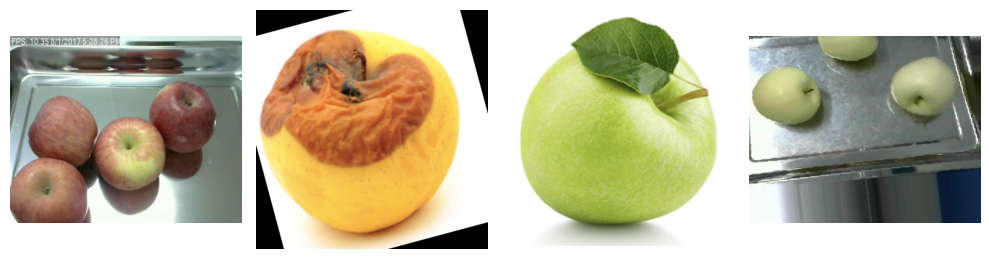

In [ ]:
import cv2

# Plot the images
fig = plt.figure(figsize = (10,10))
for i, im in enumerate(random_img1):
  plt.subplot(2, 4, i+1)
  img = cv2.imread(os.path.join('/content/fruits & vegetables dataset/train/Apel', im))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
  plt.imshow(img_rgb)
  plt.axis('off')

plt.tight_layout()
plt.show()

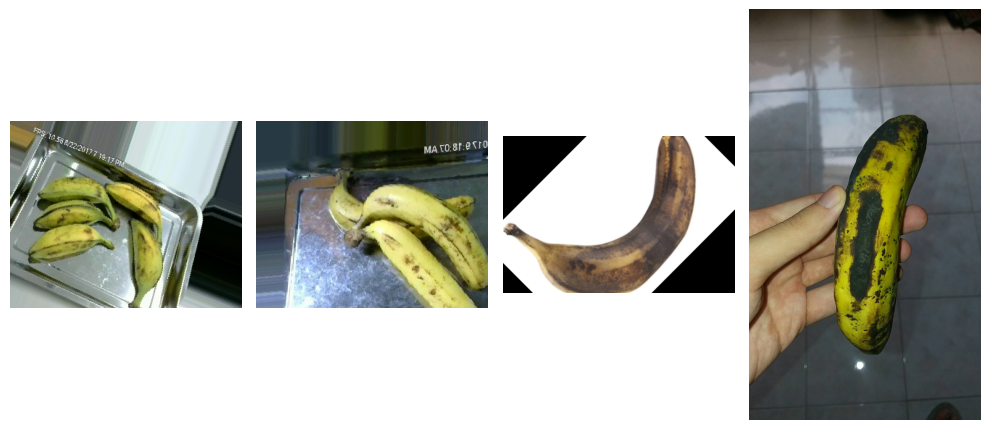

In [ ]:
# Plot the images
fig = plt.figure(figsize = (10,10))
for i, im in enumerate(random_img2):
  plt.subplot(2, 4, i+1)
  img = cv2.imread(os.path.join('/content/fruits & vegetables dataset/train/Pisang', im))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
  plt.imshow(img_rgb)
  plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Train**

---

## **Image Augmentation**

In [ ]:
def train_val_generators(train_dir, val_dir):
# Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1./255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

# Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=45,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

# Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale = 1./255.)

# Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=45,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
# Test the generators
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 6590 images belonging to 6 classes.
Found 3661 images belonging to 6 classes.


## **Model Building**

In [ ]:
# Building model
mnet = MobileNetV2(include_top = False,
                   weights = 'imagenet',
                   input_shape=(224,224,3))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
tf.keras.backend.clear_session()

model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    Dense(64, activation = "relu"),
                    Dropout(0.3),
                    Dense(6, activation = "softmax")])

model.layers[0].trainable = False

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics="accuracy")

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

## **Callbacks**

In [ ]:
# Learning Rate

def scheduler(epoch):
  if epoch <= 2:
    return 0.001
  elif epoch > 2 and epoch <= 15:
    return 0.0001
  else:
    return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# Early Stopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

In [ ]:
# Callback

DESIRED_ACCURACY = 0.95

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') is not None and logs.get('accuracy') >= DESIRED_ACCURACY):
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True

callbacks = MyCallback()

## **Training**

In [ ]:
epochs = 100
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = epochs,
                    verbose = 1,
                    callbacks = [lr_callbacks, early_stopping, callbacks]
                    )

Epoch 1/100
147/147 [==============================] - 615s 4s/step - loss: 0.3932 - accuracy: 0.8687 - val_loss: 0.1265 - val_accuracy: 0.9568 - lr: 0.0010
Epoch 2/100
147/147 [==============================] - 572s 4s/step - loss: 0.1830 - accuracy: 0.9407 - val_loss: 0.1041 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 3/100
147/147 [==============================] - ETA: 0s - loss: 0.1458 - accuracy: 0.9527
Reached accuracy threshold! Terminating training.
147/147 [==============================] - 585s 4s/step - loss: 0.1458 - accuracy: 0.9527 - val_loss: 0.0802 - val_accuracy: 0.9716 - lr: 0.0010


# **Visualize The Result**

---

## **Plot Loss & Accuracy**

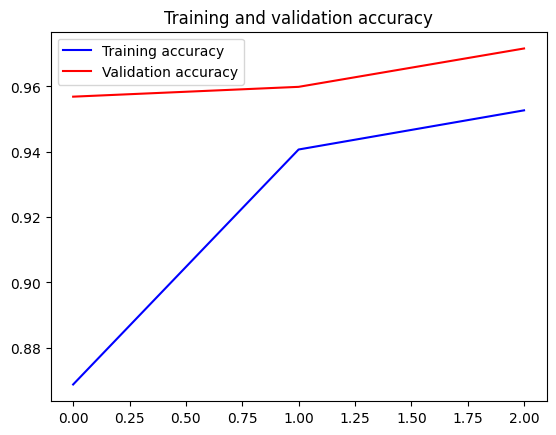

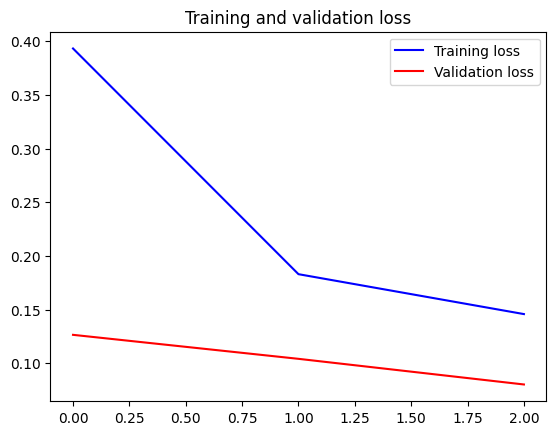

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Evaluate Model**

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(224,224),
                                                  shuffle = False,
                                                  class_mode='categorical')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 3662 images belonging to 6 classes.
3662/3662 [==============================] - 179s 49ms/step - loss: 0.0615 - accuracy: 0.9806
accuracy test:  0.9806116819381714
loss test:  0.06145347282290459


In [ ]:
import os
import numpy as np
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from google.colab import files

# Load model pertama untuk mendeteksi jenis buah
model_jenis_buah = load_model('/content/saved_modelfa.h5')

# Load model kedua untuk mendeteksi kesegaran buah
model_kesegaran = load_model('/content/modelbinary.h5')

# Input layer
input_layer = Input(shape=(224, 224, 3))

# Model pertama untuk deteksi jenis buah
x = model_jenis_buah(input_layer)
jenis_buah_output = Flatten()(x)  # Flatten layer untuk jenis buah

# Model kedua untuk deteksi kesegaran buah
input_layer_kesegaran = Input(shape=(150, 150, 3))
y = model_kesegaran(input_layer_kesegaran)
kesegaran_output = Flatten()(y)  # Flatten layer untuk kesegaran buah

# Gabungkan kedua output
combined_model = Model(inputs=[input_layer, input_layer_kesegaran], outputs=[jenis_buah_output, kesegaran_output])

# Kompilasi model gabungan
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Simpan model gabungan
combined_model.save('/content/combined_model.h5')

print("Model gabungan telah disimpan sebagai 'combined_model.h5'.")


Model gabungan telah disimpan sebagai 'combined_model.h5'.


Saving freshApple (1).jpg to freshApple (1) (3).jpg


1/1 [==============================] - 0s 280ms/step


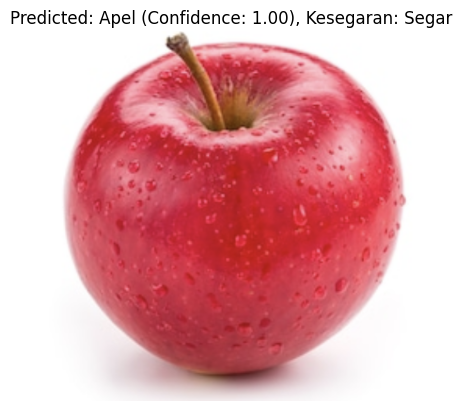

{
    "freshApple (1) (3).jpg": {
        "Jenis Buah": "Apel",
        "Confidence": 0.9999371767044067,
        "Kesegaran Buah": "Segar"
    }
}


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import files
import json  # Import the JSON module

# Load the combined model
combined_model = load_model('/content/combined_model.h5')

# List of class labels for the model
class_labels = ['Apel', 'Pisang', 'Paprika', 'Jeruk', 'Wortel', 'Timun']

def predict_jenis_buah(model, class_labels, file_name, target_size=(224, 224), confidence_threshold=0.6):
    img = load_img(file_name, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict([img_array, np.zeros((1, 150, 150, 3))])[0]
    confidence = np.max(prediction)
    predicted_class_index = np.argmax(prediction)
    if predicted_class_index >= len(class_labels) or confidence < confidence_threshold:
        return "0", confidence
    predicted_label = class_labels[predicted_class_index]
    return predicted_label, confidence

def predict_kesegaran(model, file_name, target_size=(150, 150)):
    img = load_img(file_name, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict([np.zeros((1, 224, 224, 3)), img_array])[1]
    predicted_label = 'Segar' if prediction[0] > 0.01 else 'Tidak Segar'
    return predicted_label

# Upload and predict new images
uploaded = files.upload()
results = {}
for fn in uploaded.keys():
    file_path = fn
    jenis_buah, confidence = predict_jenis_buah(combined_model, class_labels, file_path)
    if jenis_buah == "0":
        kesegaran_buah = "0"
    else:
        kesegaran_buah = predict_kesegaran(combined_model, file_path)

    # Store the results in a dictionary
    results[fn] = {
        'Jenis Buah': jenis_buah,
        'Confidence': float(confidence),
        'Kesegaran Buah': kesegaran_buah
    }

    # Optionally, display the image and the predictions
    img = load_img(file_path)
    plt.imshow(img)
    plt.title(f'Predicted: {jenis_buah} (Confidence: {confidence:.2f}), Kesegaran: {kesegaran_buah}')
    plt.axis('off')
    plt.show()

# Convert the results to JSON and print/display
json_output = json.dumps(results, indent=4)
print(json_output)


# **Save The Model**

---

If you wanna to save the model as .h5, run this cell below:

In [ ]:
model.save('combined_model.h5')

If you wanna to save the model as .pb, run this cell below:

In [ ]:
# # Copy our created model for safe
# save_model = model

# # Set learning phase to 0
# tf.keras.backend.set_learning_phase(0) # Ignore Dropout when inferencing

# # Model path
# export_path = '/content/saved_model/freshness_classifier/1'

# # Create the model path
# if os.path.exists(export_path) == False:
#   os.makedirs(export_path)

# # Save the model
# tf.saved_model.save(save_model, export_path)